## Working with data from Cricket matches In IPL 
1 All the relevant info is commented

2 The questions I worked on are after the Data cleaning part

3 The link to the data is given in relevant places

**Context**

Cricket is a bat-and-ball game played between two teams of eleven players each on a cricket field, at the centre of which is a rectangular 20-metre (22-yard) pitch with a target at each end called the wicket (a set of three wooden stumps upon which two bails sit). Each phase of play is called an innings, during which one team bats, attempting to score as many runs as possible, whilst their opponents bowl and field, attempting to minimise the number of runs scored. When each innings ends, the teams usually swap roles for the next innings (i.e. the team that previously batted will bowl/field, and vice versa). The teams each bat for one or two innings, depending on the type of match. The winning team is the one that scores the most runs, including any extras gained (except when the result is not a win/loss result). Source: https://en.wikipedia.org/wiki/Cricket



Acknowledgements


Source: http://cricsheet.org/ (data is available on this website in the YAML format. This is converted to CSV format by the contributors)

In [174]:
#You have to update nbformat to 4.3.0.

#conda install -c anaconda nbformat
#updated nbformat to this version, but
#conda install -c conda-forge nbformat
#installs/updates only version 4.2.0

#Packages needed for the project

import numpy as np 
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


## Data of IPL matches (Cricket Match)
__Matches contain match data__

**Delivery Contains Bowling Data**


In [225]:
matches=pd.read_csv('datasets_323_7768_matches.csv')    
delivery=pd.read_csv('deliveries.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [226]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [177]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [178]:
#DATA CLEANING PART STARTS HERE

In [179]:
matches['team1'].unique() #Finding all the unique Teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [180]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [181]:
#Finding Data and Doing Basic Analysis

In [182]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [183]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 30

Total umpires  44


In [184]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [185]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [186]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


## Questions to Work On 

* What was the decision of the team after winning the toss?
* Who were the maximum toss winners?
* The Total Matches played by a team against the total Wins
* Is the Toss winner also the match Winner
* Total Number of match played across the seasons
* Total runs across the season
* Average runs per match across the season
* Sixes and fours across the season 
* Runs Per Over By Teams Across Seasons
* Top 10 Man of the match players

In [187]:
#Toss Decision DATA

In [188]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


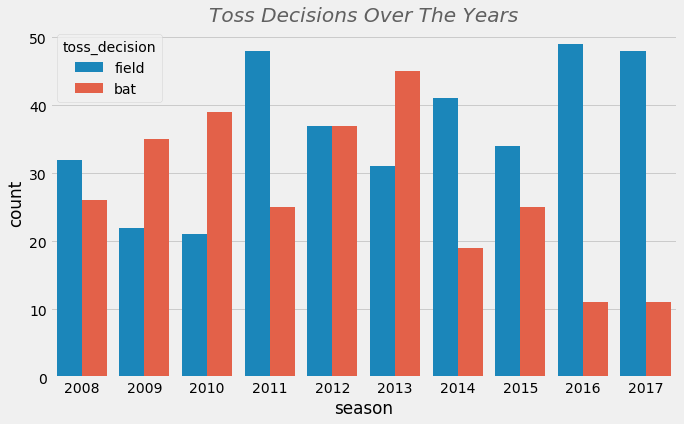

In [212]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.title('Toss Decisions Over The Years', color='Black', alpha=0.6, style = 'italic')
mlt.savefig('toss1.png', orientation='landscape')
mlt.show()


In [190]:
#Maximum Toss Winners

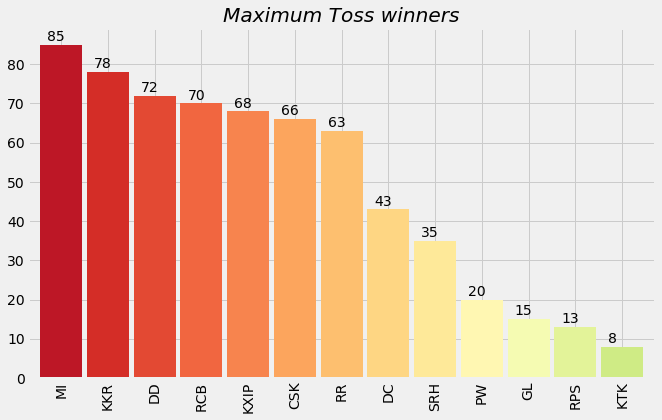

In [213]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
mlt.title('Maximum Toss winners', color='Black', style = 'italic')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
mlt.savefig('max1.png', orientation='landscape')
mlt.show()

In [192]:
#Total Matches vs Wins for Teams (INTERACTIVE)

In [227]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group')

fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    height=500,
    title_text='Total Matches vs Wins'
)
py.iplot(fig, filename='stacked-bar')

In [194]:
#Is Toss Winner Also the Match Winner?

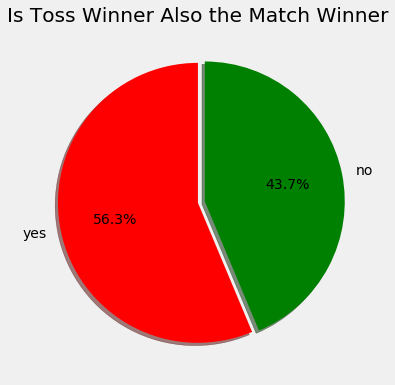

In [216]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.title('Is Toss Winner Also the Match Winner')
mlt.savefig('toss2.png', orientation='landscape')
mlt.show()

In [196]:
#Matches played across each season

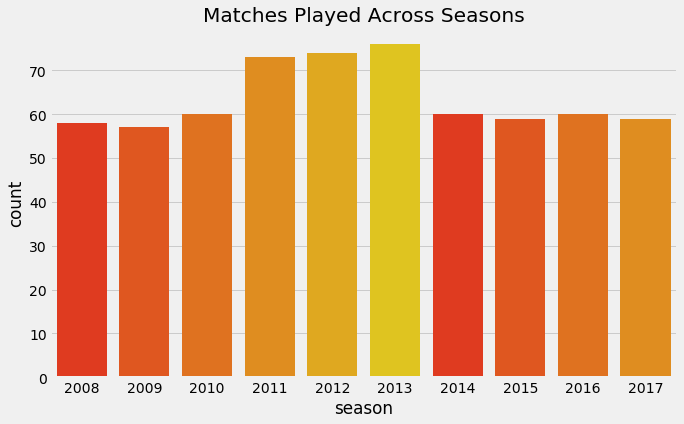

In [217]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('autumn'))  #countplot automatically counts the frequency of an item
mlt.title('Matches Played Across Seasons')
mlt.savefig('played.png', orientation='landscape')
mlt.show()

In [198]:
#Runs Across the Seasons

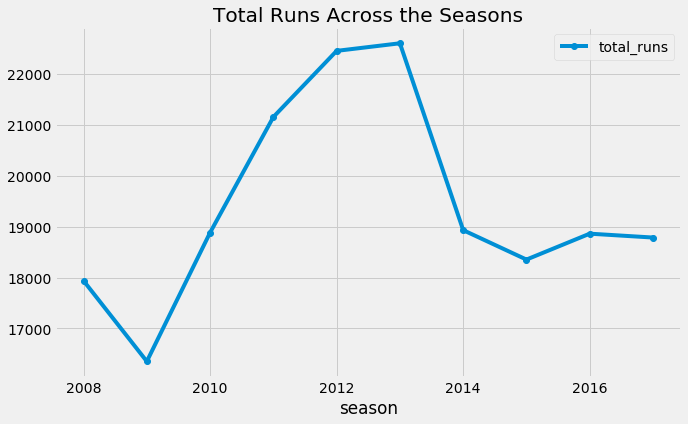

In [218]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.savefig('run.png', orientation='landscape')
mlt.show()

In [200]:
#Average runs per match in each Season

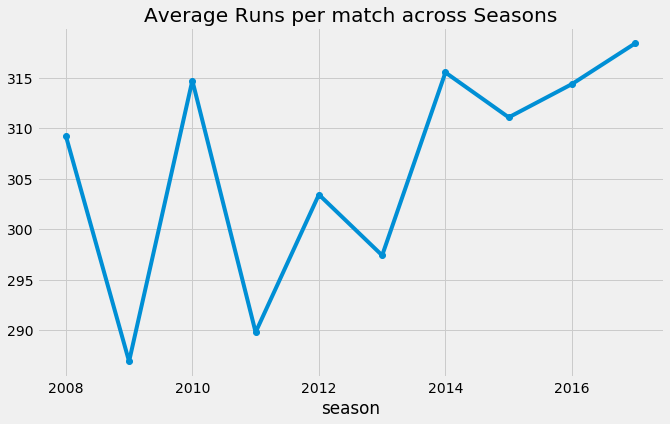

In [219]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.savefig('avgrun.png', orientation='landscape')
mlt.show()

In [202]:
#Sixes and Fours Across the Season

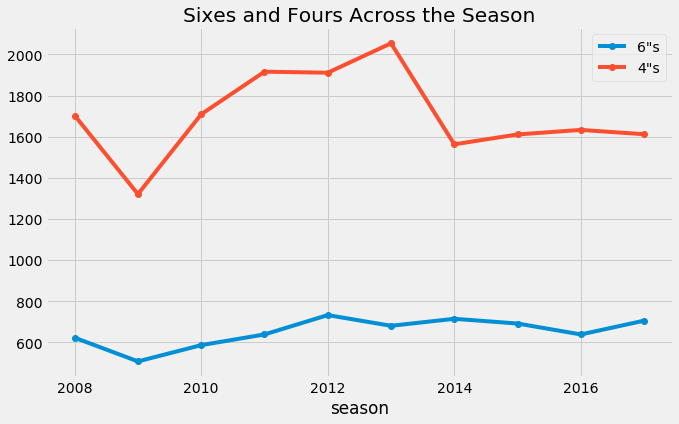

In [220]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.title('Sixes and Fours Across the Season')
mlt.savefig('6and4', orientation='landscape')
mlt.show()

In [204]:
#Runs Per Over By Teams Across Seasons

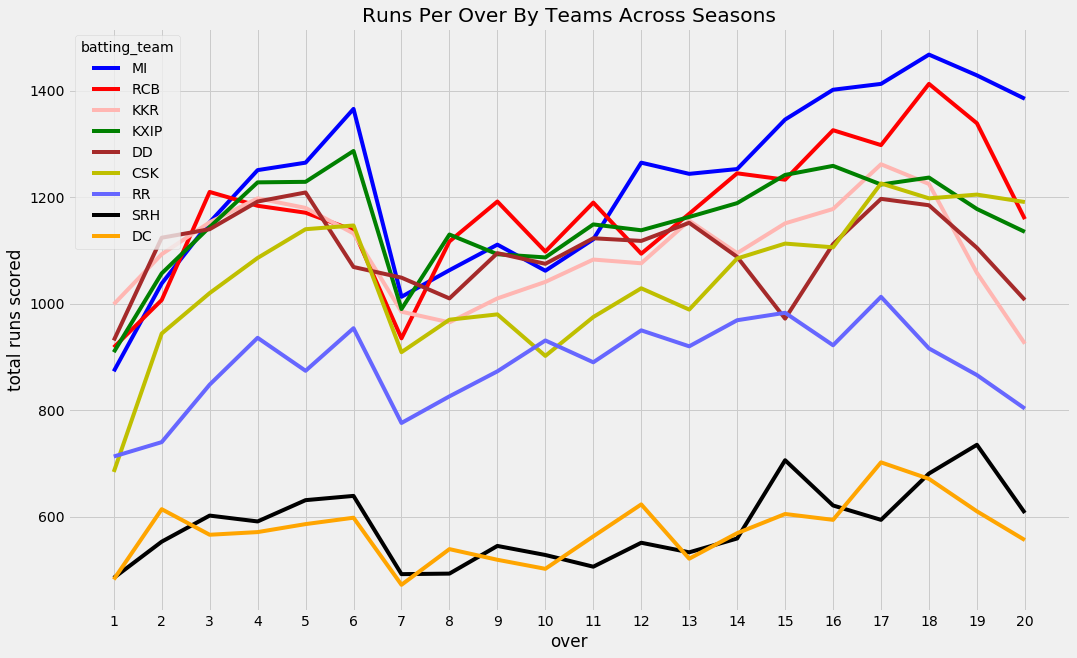

In [221]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.title('Runs Per Over By Teams Across Seasons')
mlt.savefig('runperover', orientation='landscape')
mlt.show()

In [206]:
#Man of the Match

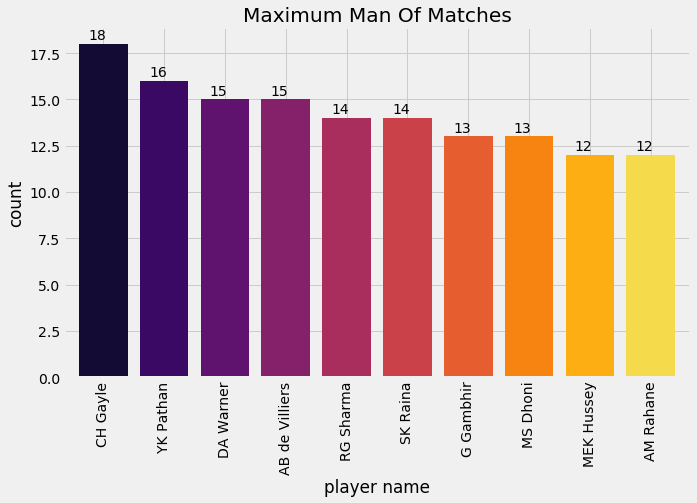

In [222]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player name') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.title('Maximum Man Of Matches')
mlt.savefig('maxManofmatch.png', orientation='landscape')
mlt.show()